# BIOS512 Assignment #4

🌬 For this assignment we are going to work with [Canada wind turbine](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/readme.md) data from TidyTuesday. 💨

Use `read_csv` to load the data from the TidyTuesday GitHub repository. The project URL is can be found at [https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/).

In [1]:
library('tidyverse')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
turbine_data=read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-10-27/wind-turbine.csv',
                     col_types=cols())

In [3]:
turbine_data |> glimpse()

Rows: 6,698
Columns: 15
$ objectid                   <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, …
$ province_territory         <chr> "Alberta", "Alberta", "Alberta", "Alberta",…
$ project_name               <chr> "Optimist Wind Energy", "Castle River Wind …
$ total_project_capacity_mw  <dbl> 0.90, 44.00, 3.78, 3.78, 3.78, 3.78, 19.50,…
$ turbine_identifier         <chr> "OWE1", "CRW1", "WWT1", "WWT2", "WWT3", "WW…
$ turbine_number_in_project  <chr> "1/2", "1/60", "1/6", "2/6", "3/6", "4/6", …
$ turbine_rated_capacity_k_w <dbl> 150, 600, 600, 600, 600, 660, 1300, 1300, 1…
$ rotor_diameter_m           <dbl> 23, 44, 44, 44, 44, 47, 60, 60, 60, 60, 60,…
$ hub_height_m               <dbl> 30, 40, 50, 50, 50, 50, 46, 46, 46, 46, 46,…
$ manufacturer               <chr> "Bonus", "Vestas", "Vestas", "Vestas", "Ves…
$ model                      <chr> "AN 150/30", "V44/600", "V44/600", "V44/600…
$ commissioning_date         <chr> "1993", "1997", "1998", "1998", "1998", "20…
$ latitude      

In [4]:
turbine_data |> head()

objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Alberta,Optimist Wind Energy,0.90,OWE1,1/2,150,23,30,Bonus,AN 150/30,1993,49.52535,-114.0548,NA
2,Alberta,Castle River Wind Farm,44.00,CRW1,1/60,600,44,40,Vestas,V44/600,1997,49.51264,-114.0357,NA
3,Alberta,Waterton Wind Turbines,3.78,WWT1,1/6,600,44,50,Vestas,V44/600,1998,49.23307,-113.6549,NA
4,Alberta,Waterton Wind Turbines,3.78,WWT2,2/6,600,44,50,Vestas,V44/600,1998,49.23303,-113.6302,NA
5,Alberta,Waterton Wind Turbines,3.78,WWT3,3/6,600,44,50,Vestas,V44/600,1998,49.21755,-113.6802,NA
6,Alberta,Waterton Wind Turbines,3.78,WWT4,4/6,660,47,50,Vestas,V47/660,2000,49.21773,-113.6579,NA


Each row in the table represents a single turbine.

Make a bar chart 📊 **sorted by frequency** of turbine count per province territory. (Hint: `fct_infreq` will sort your factor levels by frequency for subsequent plotting)

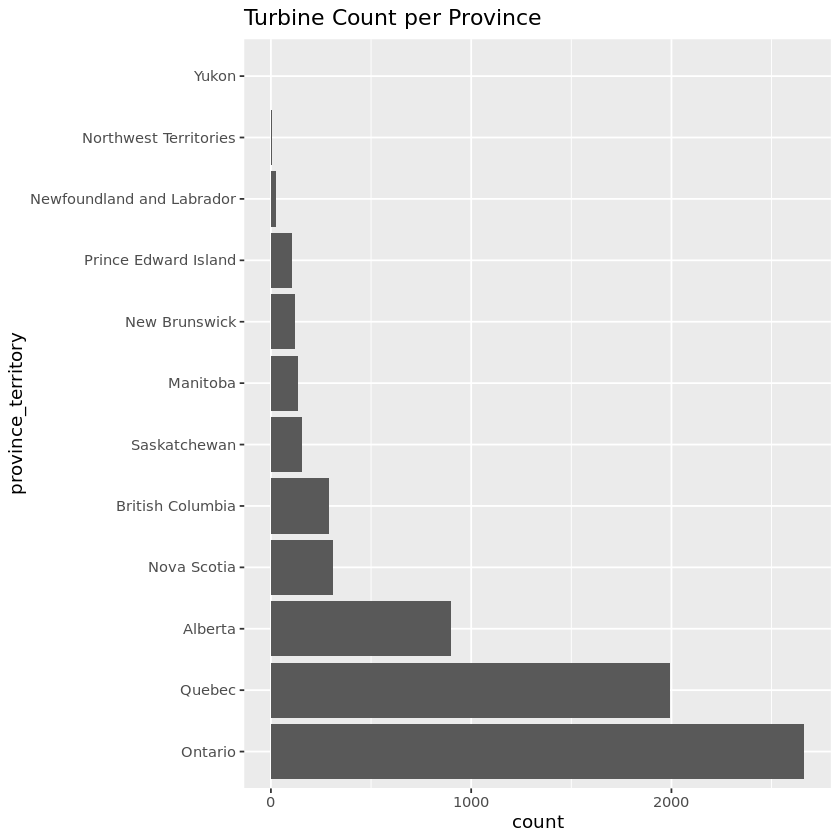

In [5]:
turbines_by_province = turbine_data |>
        mutate(province_territory = fct_infreq(province_territory)) 

p=ggplot(turbines_by_province, aes(y=province_territory)) +geom_bar() + ggtitle("Turbine Count per Province")

p

Make a bar chart **sorted by frequency** of turbine count per manufacturer. **Group the low frequency manufacturers into an `Other` category**.

**Bonus:** Can you force the `Other` category to be the last bar? 

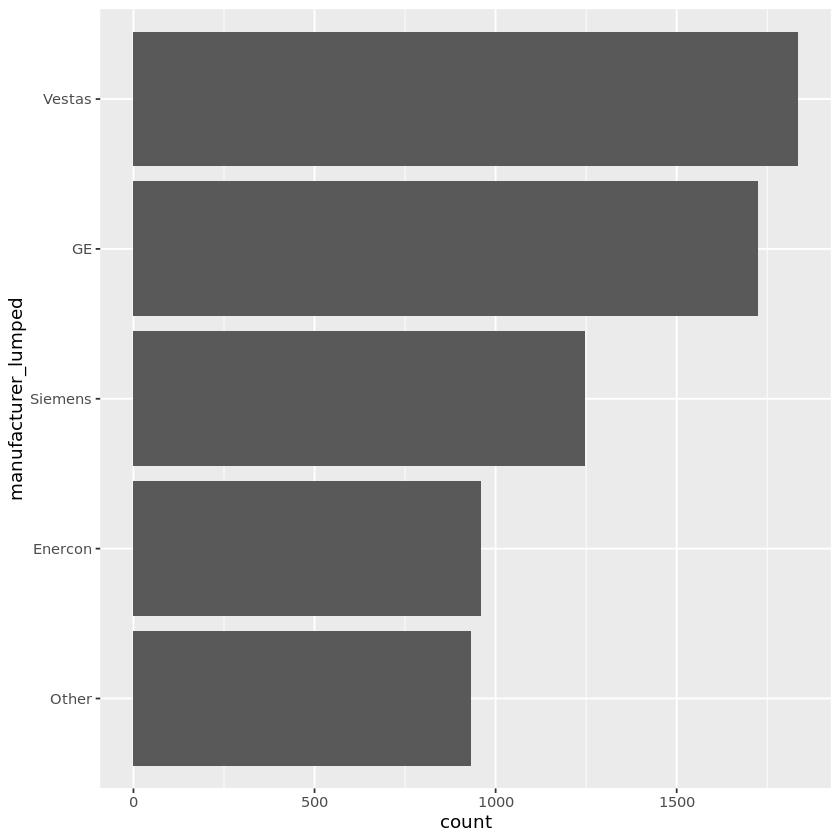

In [7]:
turbines_by_manufacturer = turbine_data |>
    mutate(manufacturer_lumped = manufacturer %>% fct_lump() %>%
          fct_infreq() %>% 
           fct_relevel('Other', after= Inf) %>%
           fct_rev())

p = ggplot(turbines_by_manufacturer, aes(y=manufacturer_lumped)) +geom_bar()
p
